(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

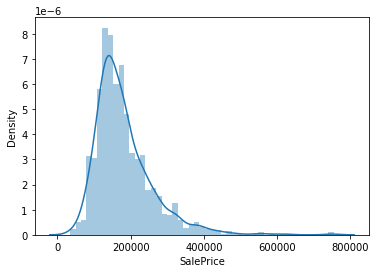

In [5]:
#Yackeline España A.
# Talle No 1
#Dado el siguiente data set
#kaggle.com/c/house-prices-advanced-regression-techniques/data
#Se debe realizar un análisis descriptivo y exploratorio de los datos
# el problema es la predicción del precio de las viviendas,
# entonces la variable objetivo es  'SalePrice'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

# Asignamos los datos a un dataframe:
df = pd.read_csv('train.csv')

# Para ver las columnas del dataframe:

df.head(10)

# Para conocer la dimensionalidad de los datos, 
# nombres de características y tipos de características.

print(df.shape)
# Podemos observar que el dataframe  contiene 1460 filas y 81 columnas.

# Ahora revisamos los nombres de las columnas 
print(df.columns)

# Para generar información general sobre el marco de datos:
print(df.info())

# bool, int64, float64 y object son los tipos de datos de nuestro dataset
#Vemos que 35 son característica de tipo entero (int64), 43 características son de tipo objeto y 
#3 características son de tipo float (float64).

df['SalePrice'].describe()

# Histograma

sns.distplot(df['SalePrice'])


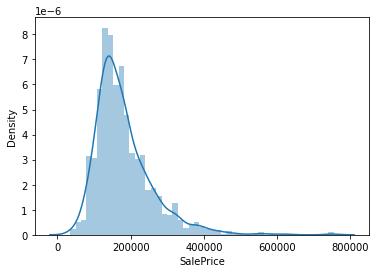

In [3]:
# Vamos ahora a realizar la limpieza de datos y saber cuantos datos desaparecidos o faltantes hay
# #Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

# Datos perdidos usamos la función isnull para saber que datos son nulos
totalperdidos = df.isnull().sum().sort_values(ascending = False)
porcentajeperdidos = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
datos_perdidos = pd.concat([totalperdidos, porcentajeperdidos], axis = 1, keys = ['Total', 'Porcentaje'])
datos_perdidos.head(10)
# de estas las columnas PoolQC , MiscFeature, Alley ,  Fence, FireplaceQu, LotFrontage 
# ocupan los primeros lugares en datos faltantes

# Elimino las variables con más de un 15% de datos faltantes 
# (ej. PoolQC, MiscFeature, Alley, Fence, etc.)
# Ya que considero no son aspectos importantes a considerar al comprar una casa.
# En la variable 'Electrical', hay sólo un dato faltante por lo tanto se borra el dato y
# mantengo la variable. En resumen, se borraran todas las variables con datos desaparecidos, 
# excepto la variable 'Electrical'. Y en este caso sólo se borrará la observación con el dato faltante.

# Para el tratamiento de los datos faltantes:
df = df.drop((datos_perdidos[datos_perdidos['Total'] > 1]).index,1)
# Se elimina el valor nulo de la columna Electrical
df = df.drop(df.loc[df['Electrical'].isnull()].index)
# Para comprobar que no hay más datos desaparecidos.
df.isnull().sum().max() 

# Datos atípicos
# Los datos atípicos o OUTLIER son datos que son considerablemente diferente a los otros 
# datos de la muestra y pueden afectar marcadamente el modelo.
# los valores atípicos son datos que son muy diferentes a la tendencia
# expresada por los otros valores del conjunto de datos

# Estandarización de datos:
# Análisis Univariable

precioventa_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])
low_range = precioventa_scaled[precioventa_scaled[:,0].argsort()][:10]
high_range = precioventa_scaled[precioventa_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

# Análisis bivariable SalePrice/GrLivArea:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
#print('\nAnálisis bivariable SalePrice/GrLivArea')
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

# El diagrama de dispersión muestra lo siguiente:
# 1. Los dos valores más altos de la variable 'GrLivArea' resultan extraños, 
# por lo tanto estos dos puntos son atípicos, por lo que procedo a eliminarlos
# Las dos observaciones más altas de la variable 'SalePrice' se corresponden 
# con las que observamos en el análisis univariable anterior. 
# Son casos especiales, pero parece siguen una tendencia general, por lo que se mantienen.

# Eliminación de valores:
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

# Análisis bivariable SalePrice/TotalBsmtSF:

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha =0.5);

# Algunos valores parecen bastante extremos (p.ej. TotalBsmtSF > 3000), 
# pero conservan la tendencia, por lo que se mantienen



# Los valores bajos son similares y no muy alejados del 0.
# Los valores altos están muy alejados del 0.
# Los valores superiores a 7 están realmente fuera de rango.
# La variable 'SalePrice' es la variable objetivo de este dataset. 
# Estadistica descriptiva de la variabke objetivo Saleprice
#df['SalePrice'].describe()

#sns.distplot(df['SalePrice'])

# Del histograma mostrado podemos concluir:

# Existe desviación con respecto a la distribución normal.
# Existe asimetría positiva.

In [6]:
# Podemos apreciar: Una desviación con respecto a la distribución normal.
# Asimetría positiva y algunos picos.
# Asimetría y curtosis:

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282

Skewness: 1.882876
Kurtosis: 6.536282


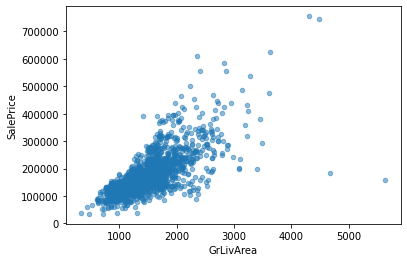

In [7]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

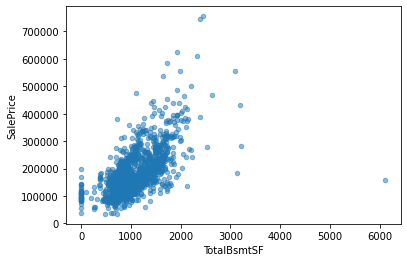

In [8]:
# Diagrama de dispersión totalbsmtsf/saleprice:

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

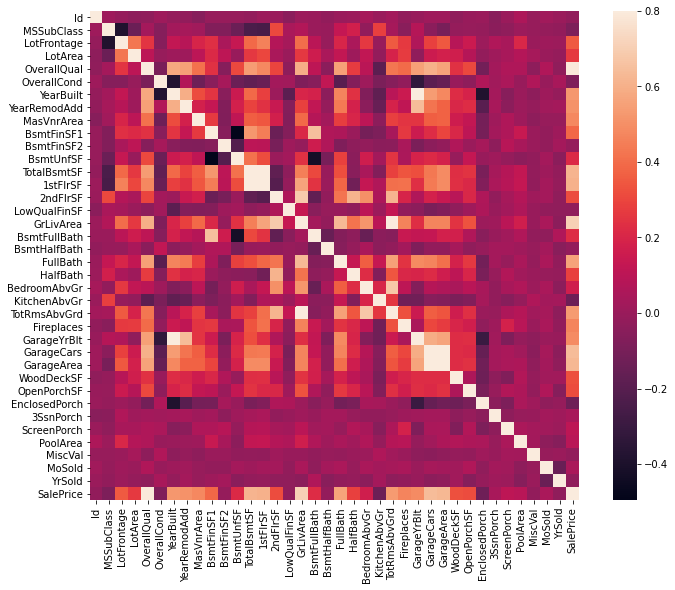

In [15]:
# Matriz de correlación:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

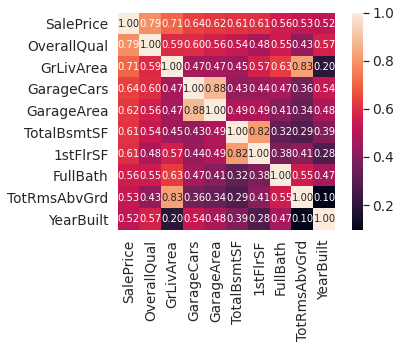

In [18]:
#El mapa de calor permite conocer las variables y sus relaciones. 
# En ambos casos parece haber una correlación significativa; 

#Con respecto a las correlaciones de la variable 'SalePrice', 
# destacan las vistas anteriormente ('GrLivArea', 'TotalBsmtSF' y 'OverallQual')
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()


NameError: ignored

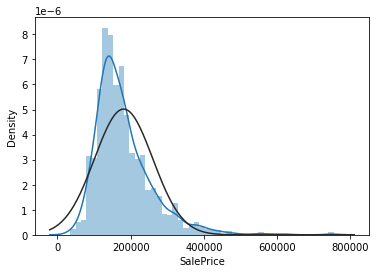

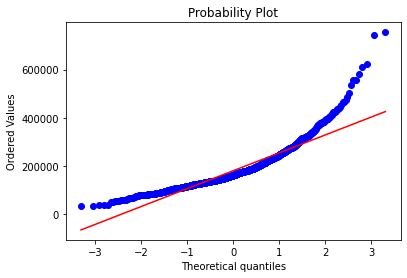

In [36]:
# Luego de haber hecho limpieza de datos y estudiado la variable 'SalePrice'. 
# Vamos a comprobar si 'SalePrice' cumple las asunciones estadísticas que
# permiten aplicar las técnicas del análisis multivariable.

# Histograma y gráfico de probabilidad normal
sns.distplot(df['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)

# La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.
# Del gráfico observamos que la variable 'SalePrice' no forma una distribución normal, ya que muestra picos,
# asimetría positiva y no sigue la línea diagonal.
# sin embargoe una simple transformación de datos puede solucionarlo.


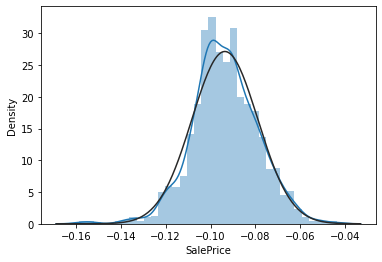

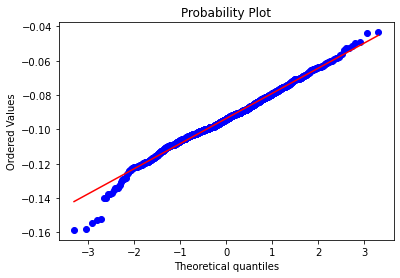

In [40]:
# Transformación de los datos:

df['SalePrice'] = np.log(df['SalePrice'])

# Ahora realizamos el Histograma y gráfico de probabilidad normal sobre los datos ya transformados

sns.distplot(df['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)

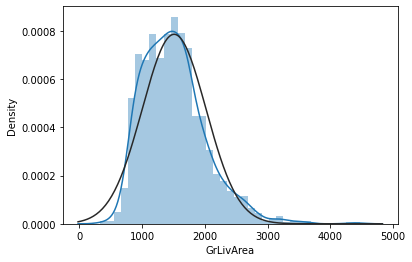

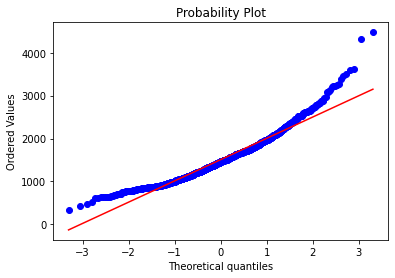

In [41]:
# Ahora vamos a revisar la variable 'GrLivArea'.
# Histograma y gráfico de probabilidad normal

sns.distplot(df['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot = plt)

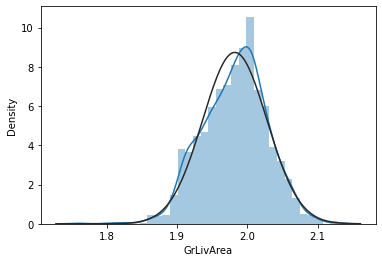

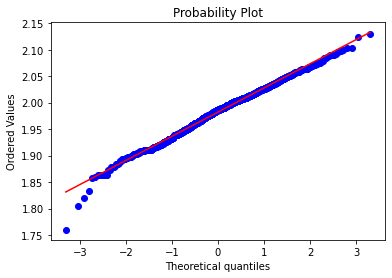

In [43]:
# La variable 'GrLivArea' presenta asimetría.
# Hacemos Transformación de datos:

df['GrLivArea'] = np.log(df['GrLivArea'])

# AHora hacemos el Histograma y gráfico de probabilidad normal sobre los datos transformados

sns.distplot(df['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot = plt)